# Evaluating HR dataset with EDA & Logistics Regression Model 

# Problem Statement

* 1) Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

* 2) Plot bar charts showing impact of employee salaries on retention

* 3) Plot bar charts showing corelation between department and employee retention

* 4) Build logistic regression model using variables that were narrowed down in step 1

* 5) Encode the categorical data using 'get_dummy' and 'OneHotEncoder'. Measure the accuracy of the model

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#reading the csv

df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 1) Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [3]:
#to show the names of each column

df.columns 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
#value counts of the 'left' column

df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [5]:
#to show the number of rows and columns

df.shape 

(14999, 10)

In [6]:
#left has value of 1 for employee who left

left = df[df['left']== 1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
#left has a value of 0 for retained employee

retained = df[df['left']==0]
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [8]:
#to group all unique items of 'left' column and show their mean

df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
df.groupby(['left','salary']).mean()

satisfaction_level  last_evaluation  number_project  \
left salary                                                        
0    high              0.651879         0.708606        3.789610   
     low               0.668103         0.717028        3.784603   
     medium            0.668875         0.715461        3.788068   
1    high              0.434512         0.644024        3.451220   
     low               0.441248         0.716994        3.836096   
     medium            0.438550         0.724571        3.912680   

             average_montly_hours  time_spend_company  Work_accident  \
left salary                                                            
0    high              200.348052            3.693506       0.166234   
     low               198.617418            3.253888       0.183709   
     medium            199.214272            3.435952       0.168259   
1    high              193.097561            3.682927       0.000000   
     low               206.631215            3.874770       0.043738   
     medium            209.610478            3.891420       0.056188   

             promotion_last_5years  
left salary                         
0    high                 0.062338  
     low                  0.010109  
     medium               0.034315  
1    high                 0.000000  
     low                  0.006446  
     medium               0.003797

## Observations:

    1)satisfaction level of workers that left is lower
    
    2)average montly hours put in by workers that left is higher
    
    3)promotion rate within the last 5 years is lower for workers that left

### 2)Plot bar charts showing impact of employee salaries on retention

In [10]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


<AxesSubplot:xlabel='salary'>

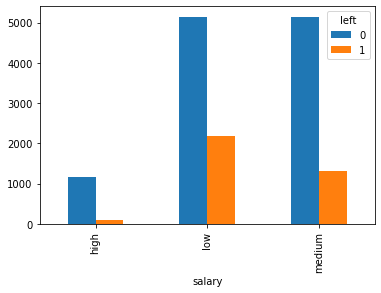

In [11]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

#### Observation: Emlpoyees with high salaries are the least type that leave the company

### 3)Plot bar charts showing corelation between department and employee retention

<AxesSubplot:xlabel='Department'>

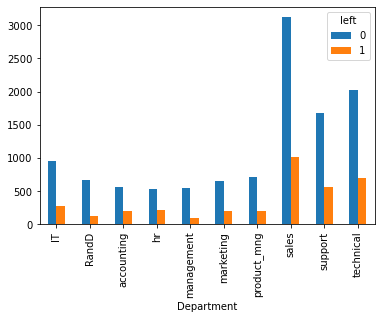

In [12]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

#### Observation: Department has an impact on employee retention...sales dept. has the highest no. of employees that left

### 4)Now build logistic regression model using variables that were narrowed down in step 1

In [13]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [34]:
#the following variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

variables = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
variables

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


### Using pandas to create dummy variables

In [35]:
#encoding the categorical variable('salary' column) using get_dummies

dummies = pd.get_dummies(variables.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [36]:
#combining the variables & dummies columns

final = pd.concat([variables, dummies], axis = 'columns')
final

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0,1,0
14995,0.37,160,0,low,1,0,1,0
14996,0.37,143,0,low,1,0,1,0
14997,0.11,280,0,low,1,0,1,0


In [39]:
#dropping the salary column

final.drop('salary', axis = 'columns', inplace = True)
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [40]:
# labelling the variables as independent columns(x-axis)

x = final
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [19]:
#labelling the left column as the dependent column(y-axis)

y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [20]:
#importing train_test_split to train_test the x and y

from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [22]:
#creating an object for logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
#training the model

model.fit(x_train, y_train)

LogisticRegression()

In [24]:
#predicting the x_test

y_predicted = model.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
#checking the accuracy of the model

model.score(x_test, y_test)

0.7816666666666666

In [26]:
#importing confusion_matrix to where was correctly predicted, and wrongly predicted

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2168,  131],
       [ 524,  177]], dtype=int64)

Text(69.0, 0.5, 'Truth')

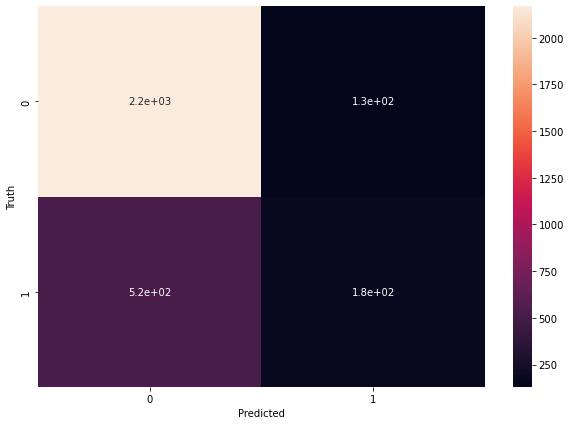

In [27]:
#using a heatmap to visualize the confusion_matrix

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using sklearn OneHotEncoder

In [30]:
#import label encoder to convert town names into numbers

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
#encoding the categorical variable('salary' column) using OneHotEncoder

dfle = variables
dfle.salary = le.fit_transform(dfle.salary)
dfle


C:\Users\AKWARA\AppData\Local\Temp\ipykernel_16508\3068296409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.salary = le.fit_transform(dfle.salary)


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,1,1
1,0.80,262,0,2,1
2,0.11,272,0,2,1
3,0.72,223,0,1,1
4,0.37,159,0,1,1
...,...,...,...,...,...
14994,0.40,151,0,1,1
14995,0.37,160,0,1,1
14996,0.37,143,0,1,1
14997,0.11,280,0,1,1


In [54]:
x = dfle[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']].values
x

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [55]:
y = dfle.left.values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('salary', OneHotEncoder(), [0])], remainder = 'passthrough')

In [65]:
x = ct.fit_transform(x)
x

<14999x95 sparse matrix of type '<class 'numpy.float64'>'
	with 44079 stored elements in Compressed Sparse Row format>

In [66]:
x = x[:,1:]
x

<14999x94 sparse matrix of type '<class 'numpy.float64'>'
	with 43884 stored elements in Compressed Sparse Row format>

In [67]:
model.fit(x,y)

C:\Users\AKWARA\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
#importing train_test_split to train_test the x and y

from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [70]:
#creating an object for logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
#training the model

model.fit(x_train, y_train)

C:\Users\AKWARA\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
#predicting the x_test

y_predicted = model.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
#checking the accuracy of the model

model.score(x_test, y_test)

0.769